In [1]:
from PIL import Image

In [2]:
def unmerge(image_path):
    '''
    Unmerge an image.
    INPUT: The path to the input image.
    OUTPUT: The extracted hidden image.
    '''

    img = Image.open(image_path)

    # Load the pixel map
    pixel_map = img.load()

    # Create the new image and load the pixel map
    new_image = Image.new(img.mode, img.size)
    pixels_new = new_image.load()

    # Tuple used to store the image original size
    original_size = img.size

    for i in range(img.size[0]):
        for j in range(img.size[1]):
            # Get the RGB (as a string tuple) from the current pixel
            r, g, b = integer_to_binary(pixel_map[i, j])

            # Extract the last 4 bits (corresponding to the hidden image)
            # Concatenate 4 zero bits because we are working with 8 bit values
            rgb = (r[4:] + "0000",
                   g[4:] + "0000",
                   b[4:] + "0000")

            # Convert it to an integer tuple
            pixels_new[i, j] = binary_to_integer(rgb)

            # If this is a 'valid' position, store it
            # as the last valid position
            if pixels_new[i, j] != (0, 0, 0):
                original_size = (i + 1, j + 1)

    # Crop the image based on the 'valid' pixels
    new_image = new_image.crop((0, 0, original_size[0], original_size[1]))

    new_image.save('extracted.png')
    print('\nHidden image saved as "extracted.png"\n')

    return new_image


In [3]:
def integer_to_binary(rgb):
    '''
    Convert RGB pixel values from integer to binary
    INPUT: An integer tuple (e.g. (220, 110, 96))
    OUTPUT: A string tuple (e.g. ("00101010", "11101011", "00010110"))
    '''
    r, g, b = rgb
    return ('{0:08b}'.format(r),
            '{0:08b}'.format(g),
            '{0:08b}'.format(b))


In [4]:
def binary_to_integer(rgb):
    '''
    Convert RGB pixel values from binary to integer.
    INPUT: A string tuple (e.g. ("00101010", "11101011", "00010110"))
    OUTPUT: Return an int tuple (e.g. (220, 110, 96))
    '''
    r, g, b = rgb
    return (int(r, 2),
            int(g, 2),
            int(b, 2))



Hidden image saved as "extracted.png"



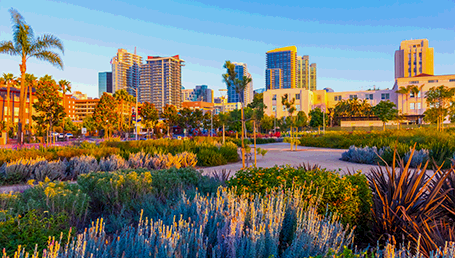

In [5]:
stego_image='stego.png'

import cv2 
image = cv2.imread(stego_image) 
cv2.imshow('image', image) 
k = cv2.waitKey(0) & 0xFF
if k == 27:  
    cv2.destroyAllWindows
unmerge(stego_image)